<a href="https://colab.research.google.com/github/pateltanvi2992/Prediction-of-Covid-19/blob/main/NB_eight_cofector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/pateltanvi2992/Covid-19-Classification-dataset/main/Corona-1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset.shape

(278848, 10)

In [ ]:
dataset = dataset[dataset.cough != "None"]

In [ ]:
dataset["cough"] = dataset["cough"].astype(str).astype(int)

In [ ]:
dataset = dataset[dataset.fever != "None"]

In [ ]:
dataset["fever"] = dataset["fever"].astype(str).astype(int)

In [ ]:
dataset["sore_throat"] = dataset["sore_throat"].astype(str).astype(int)

In [ ]:
dataset["shortness_of_breath"] = dataset["shortness_of_breath"].astype(str).astype(int)

In [ ]:
dataset["head_ache"] = dataset["head_ache"].astype(str).astype(int)

In [ ]:
dataset = dataset[dataset.corona_result != "other"]

In [ ]:
print(dataset['gender'].unique())

['female' 'male' 'None']


In [ ]:
print(dataset['age_60_and_above'].unique())

['None' 'Yes' 'No']


In [ ]:
dataset = dataset[dataset.gender != "None"]

In [ ]:
dataset = dataset[dataset.age_60_and_above != "None"]

In [ ]:
dataset.shape

(136294, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder.fit(dataset['gender'])

LabelEncoder()

In [ ]:
dataset['gender'] = encoder.transform(dataset['gender'])

In [ ]:
encoder.fit(dataset['age_60_and_above'])

LabelEncoder()

In [ ]:
dataset['age_60_and_above'] = encoder.transform(dataset['age_60_and_above'])

In [ ]:
encoder.fit(dataset['test_indication'])

LabelEncoder()

In [ ]:
dataset['test_indication'] = encoder.transform(dataset['test_indication'])

In [ ]:
dataset.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,2020-04-14,1,0,0,0,0,negative,1,1,2
122809,2020-04-14,1,0,0,0,0,positive,0,0,2
122810,2020-04-14,0,0,0,0,0,negative,0,0,2
122811,2020-04-14,0,1,0,0,0,negative,0,0,0
122812,2020-04-14,1,0,0,0,0,negative,1,0,2


In [ ]:
dataset.shape

(136294, 10)

In [ ]:
y=dataset.iloc[:,6]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X=dataset.iloc[:,[1,2,3,4,5,7,8,9]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
Navie_Bayes = GaussianNB()

#fit the model using the training data
Navie_Bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
X_train.shape

(95405, 8)

In [ ]:
X_test.shape

(40889, 8)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X, y)
print(importance)


[0.02083885 0.0341016  0.02340573 0.01596345 0.03602297 0.00044996
 0.00771513 0.1018619 ]


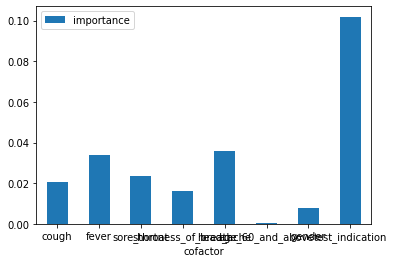

In [ ]:
df = pd.DataFrame({'cofactor':['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache', 'age_60_and_above', 'gender', 'test_indication'], 'importance': [0.02083885, 0.0341016,  0.02340573, 0.01596345, 0.03602297, 0.00044996,
 0.00771513, 0.1018619 ]})
ax = df.plot.bar(x='cofactor', y='importance', rot=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
  
# creating the dataset
data = {'cough':0.02083885, 'fever': 0.0341016, 'sore_throat': 0.02340573, 'shorness_of_breath':0.01596345, 'head_ache':0.00044996, 'age_60_and_above':0.03602297,'gender':0.00771513, 'test_indication':0.1018619 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.3)
 
plt.xlabel("Eight cofactors")
plt.ylabel("Importance of the features")
plt.title("Importance of the diffent cofactors")
plt.show()

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200

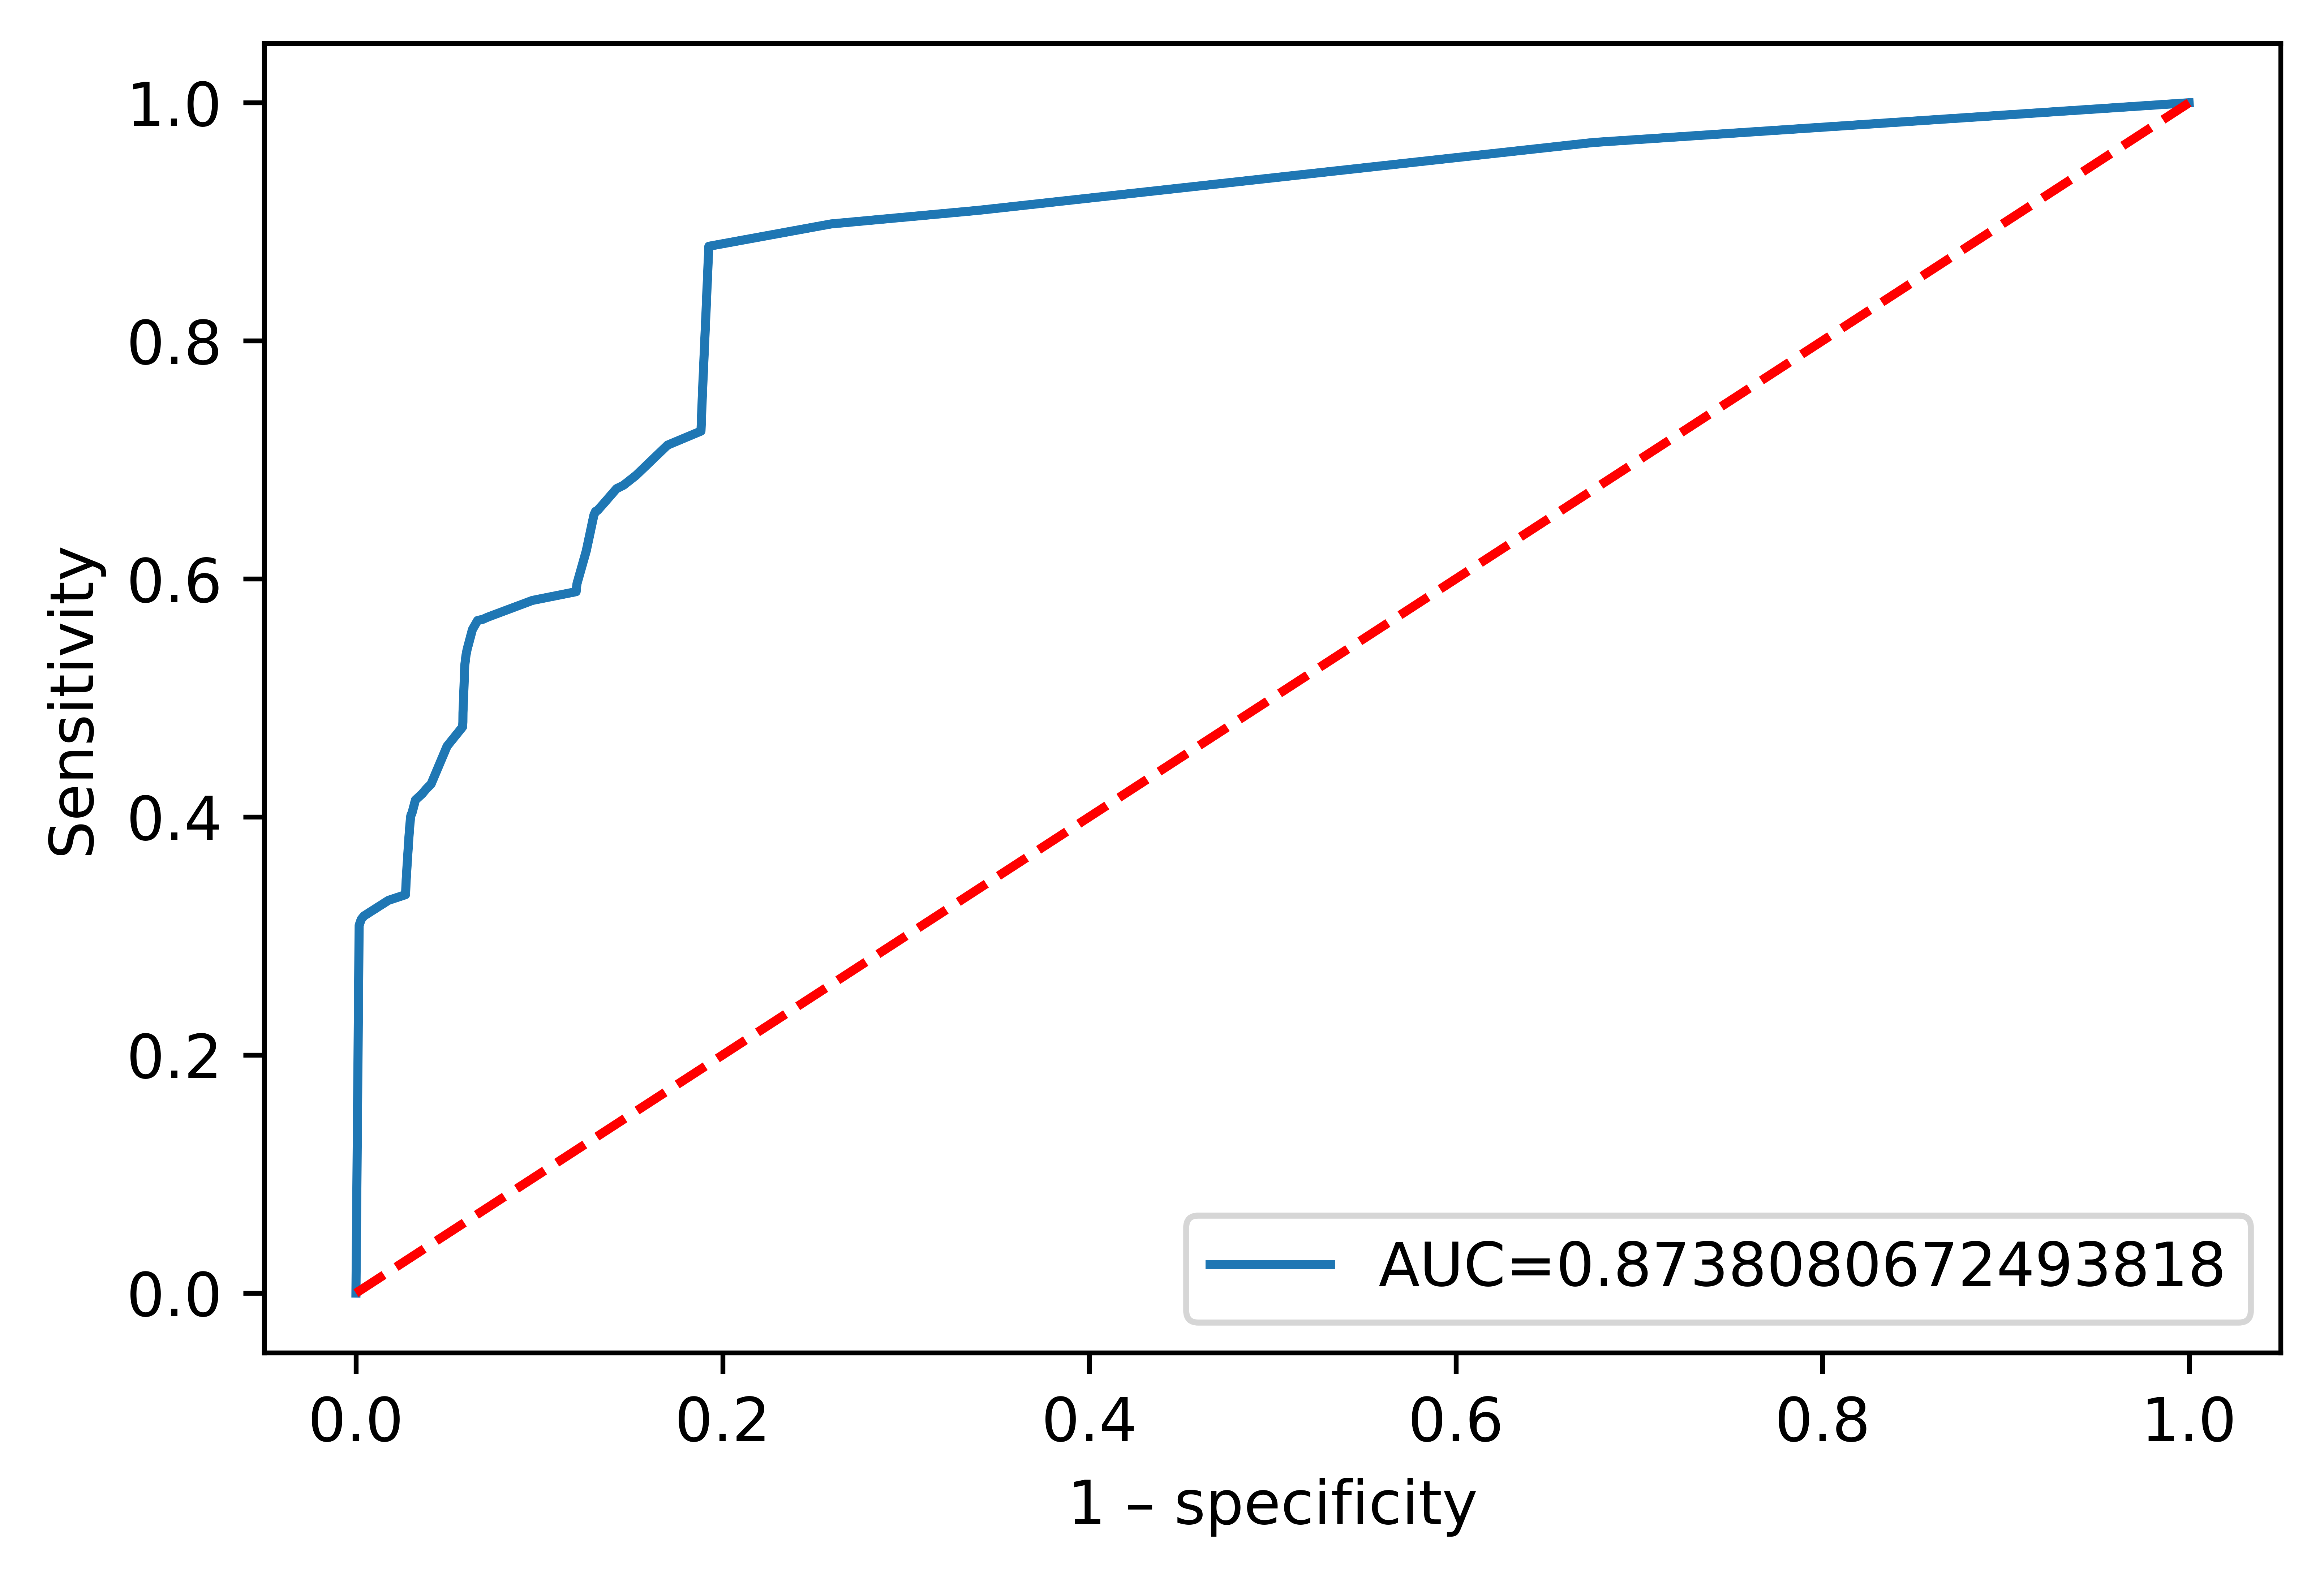

In [ ]:
#define metrics
y_pred_proba = Navie_Bayes.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.ylabel('Sensitivity')
plt.xlabel('1 – specificity')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=Navie_Bayes.predict(X_test)
accuracy_score(y_test,y_pred)

0.9452664530802906

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9322210439542289

In [ ]:
precision_score(y_test,y_pred)

0.9363548698167792

In [ ]:
recall_score(y_test,y_pred)

0.3089405027044225

In [ ]:
NB_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sns

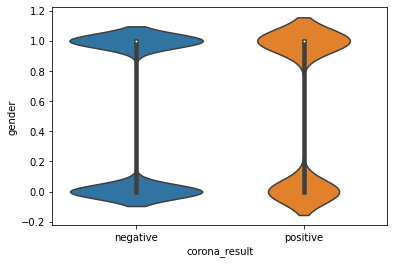

In [ ]:
# male = 1 and female = 0
sns.violinplot(x=dataset['corona_result'], y=dataset['gender'])
plt.savefig('covid-gender.png', dpi=1200)

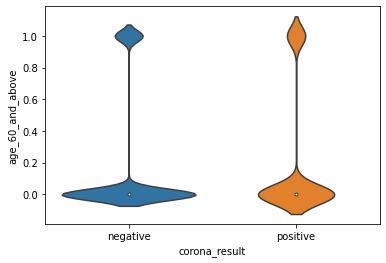

In [ ]:
sns.violinplot(x=dataset['corona_result'], y=dataset['age_60_and_above'])
plt.savefig('covid-60-above.png', dpi=1200)

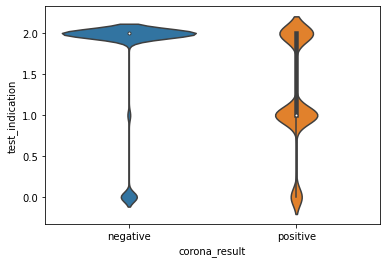

In [ ]:
# other = 2,  Abroad = 0, Contact with confirmed = 1 
sns.violinplot(x=dataset['corona_result'], y=dataset['test_indication'])
plt.savefig('covid-test-indication.png', dpi=1200)


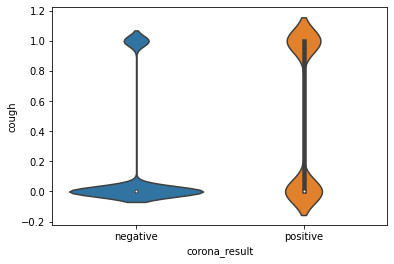

In [ ]:
sns.violinplot(x=dataset['corona_result'], y=dataset['cough'])
plt.savefig('covid-cough.png', dpi=1200)

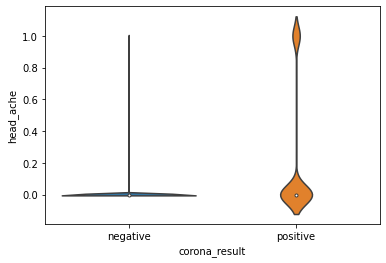

In [ ]:
sns.violinplot(x=dataset['corona_result'], y=dataset['head_ache'])
plt.savefig('covid-headache.png', dpi=1200)

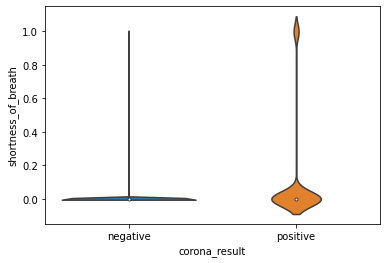

In [ ]:
sns.violinplot(x=dataset['corona_result'], y=dataset['shortness_of_breath'])
plt.savefig('covid-breath.png', dpi=1200)

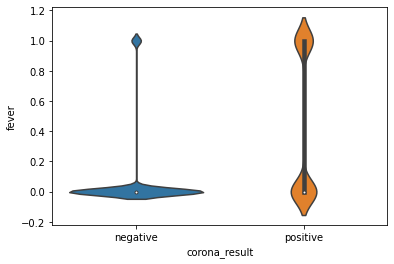

In [ ]:
sns.violinplot(x=dataset['corona_result'], y=dataset['fever'])
plt.savefig('covid-fever.png', dpi=1200)

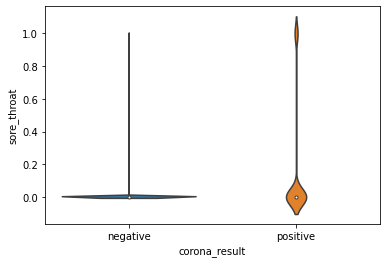

In [ ]:

sns.violinplot(x=dataset['corona_result'], y=dataset['sore_throat'])
plt.savefig('covid-sore-throat.png', dpi=1200)

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=Navie_Bayes.predict(X_test)
accuracy_score(y_test,y_pred)

0.9452664530802906

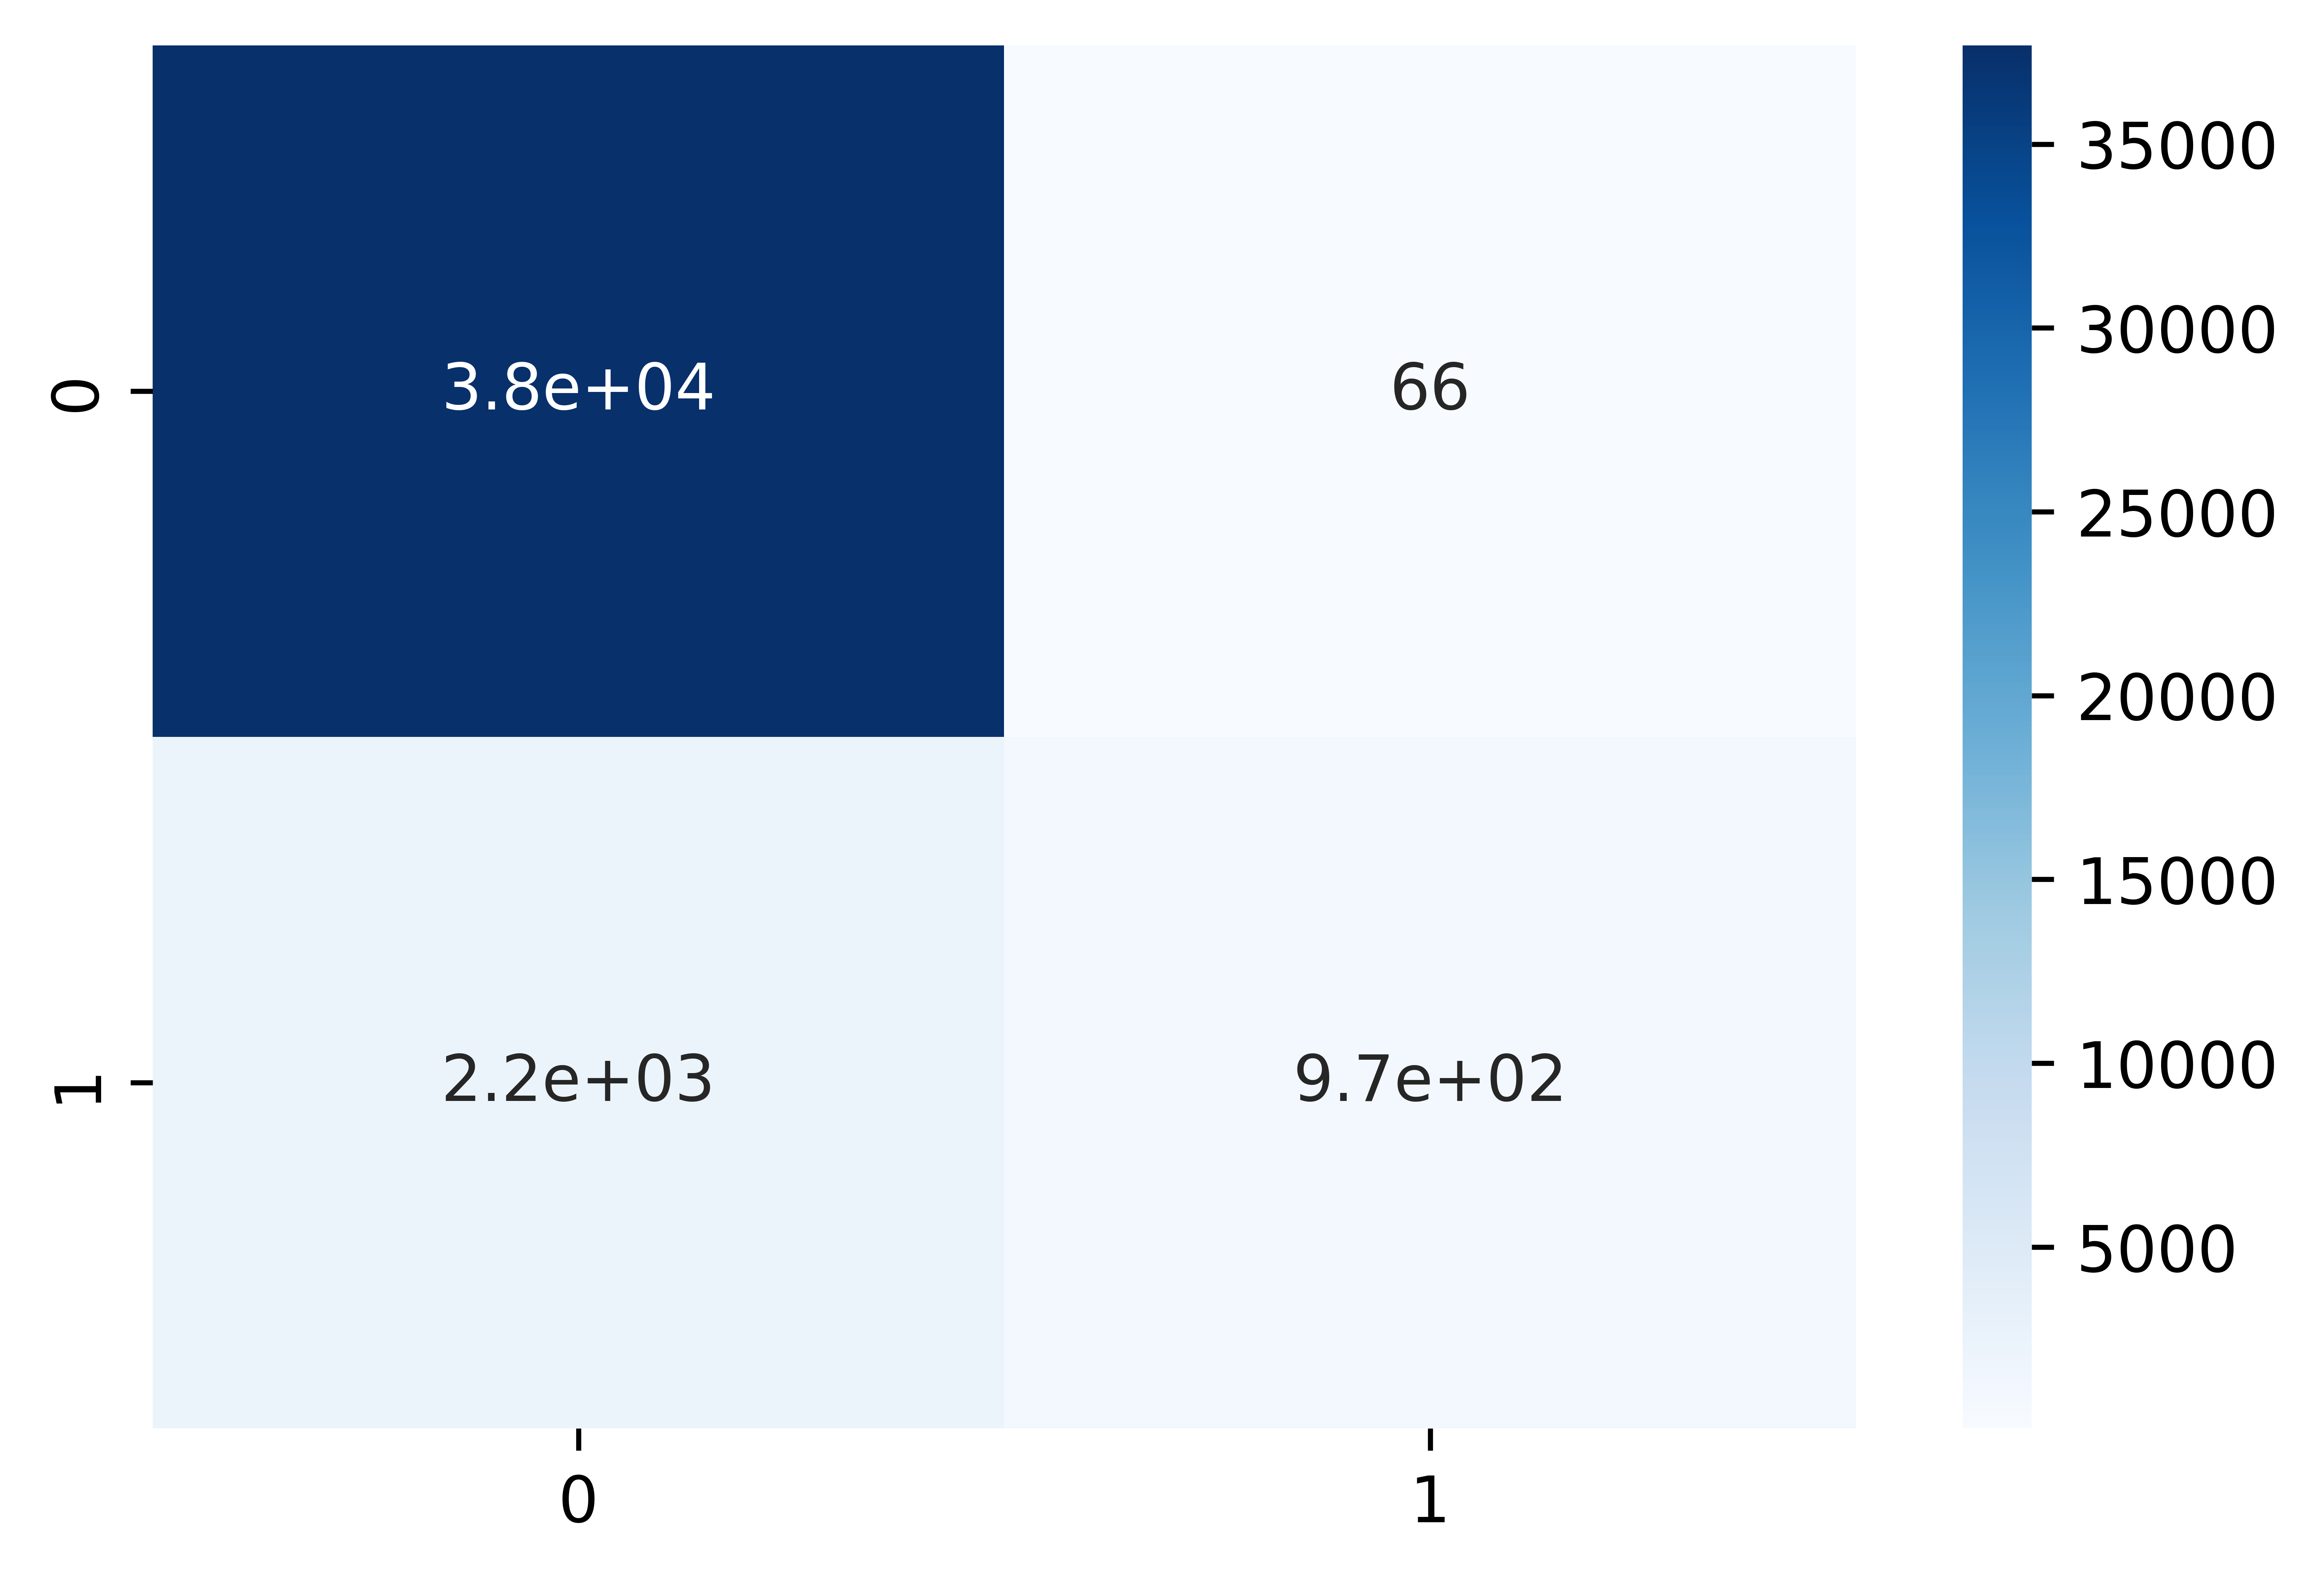

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
NB_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(NB_matrix, annot=True, cmap='Blues')

In [ ]:
print(NB_matrix)

[[37680    66]
 [ 2172   971]]
